# NOYCE Internship Paper Visual Plot

In [79]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [80]:
# loading dataset
student_data = pd.read_csv('Noyce_data.csv', index_col=False)

In [81]:
student_data

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


In [82]:
# Strip whitespace from column names
student_data.columns = student_data.columns.str.strip()

# Strip whitespace from each cell in the dataframe
#stripped_student_data = student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


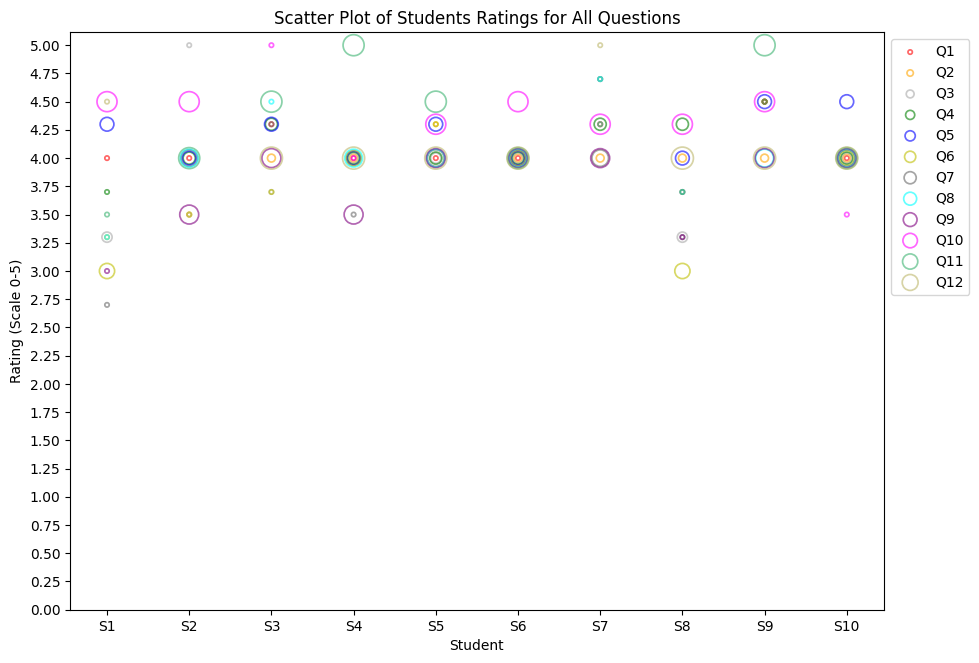

In [83]:
# Define function to determine point size
# student is the identifier for the student whose score rating (datapoint size) is being calculated
# question is reffering to the specific rating being considered for a given question
# data is referring to the dataset containing all the sata
def get_point_size(student, question, data):
    # Define a threshold to consider points as stacked (how close a point needs to be to one another to be considered as stacked)
    threshold = 0.1
    # The initial size of the point is set based on a predefined size dictionary (sizes_dict) that associates each question with a base size.
    point_size = sizes_dict[question]
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    
    # Checking if there are any other points close to this point (The function iterates through all other students' ratings for the same question)
    for other_student in data['Student']:
        # if another student
        if other_student != student:
            # The rating for another student for a particular question is retrieved from the dataset
            other_student_rating = data.loc[data['Student'] == other_student, question].values[0]
            # If another student's rating is within the defined threshold of the current student's rating, the datapoints are stacked
            if abs(student_rating - other_student_rating) < threshold:
                #returns the base point_size
                return point_size
    
    # If no close points found, return a smaller size
    return min(10, point_size)

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 10
size_increment = 22

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size + size_increment,
    'Q3': base_size + 2 * size_increment,
    'Q4': base_size + 3 * size_increment,
    'Q5': base_size + 4 * size_increment,
    'Q6': base_size + 5 * size_increment,
    'Q7': base_size + 6 * size_increment,
    'Q8': base_size + 7 * size_increment,
    'Q9': base_size + 8 * size_increment,    
    'Q10': base_size + 9 * size_increment,
    'Q11': base_size + 10 * size_increment,
    'Q12': base_size + 11 * size_increment,
} 

# Creating a scatter plot for each question
# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
for question in student_data.columns[1:]:
    sizes = [get_point_size(student, question, student_data) for student in student_data['Student']]
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# adjusting legen
legend = plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

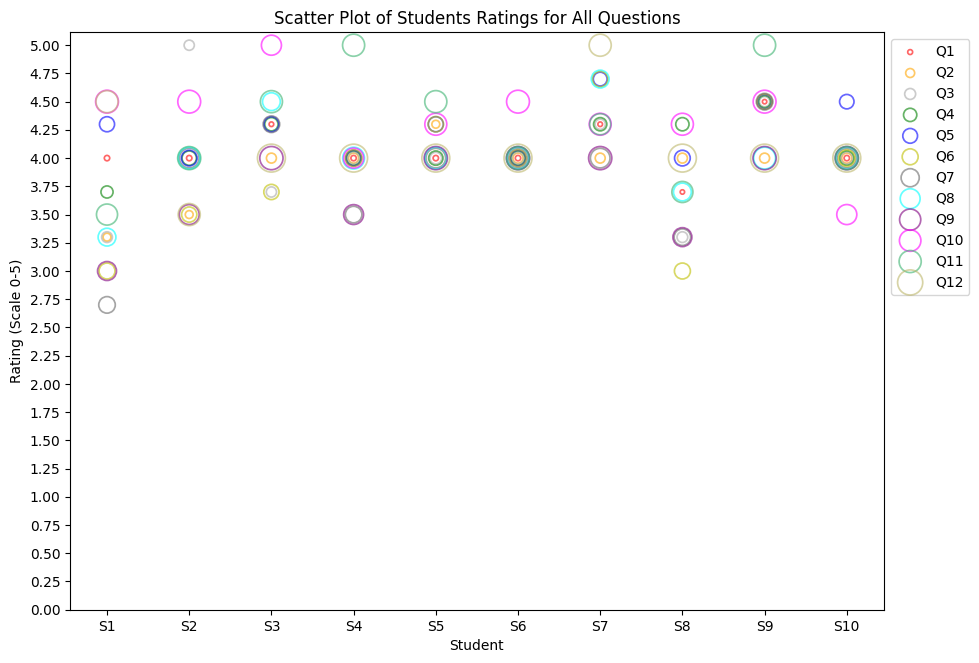

In [84]:
# Define function to determine point size
# student is the identifier for the student whose score rating (datapoint size) is being calculated
# question is reffering to the specific rating being considered for a given question
# data is referring to the dataset containing all the sata
def get_point_size(student, question, data):
    # Define a threshold to consider points as stacked (how close a point needs to be to one another to be considered as stacked)
    threshold = 0.1
    # The initial size of the point is set based on a predefined size dictionary (sizes_dict) that associates each question with a base size.
    point_size = sizes_dict[question]
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    
    # Checking if there are any other points close to this point (The function iterates through all other students' ratings for the same question)
    for other_student in data['Student']:
        # if another student
        if other_student != student:
            # The rating for another student for a particular question is retrieved from the dataset
            other_student_rating = data.loc[data['Student'] == other_student, question].values[0]
            # If another student's rating is within the defined threshold of the current student's rating, the datapoints are stacked
            if abs(student_rating - other_student_rating) < threshold:
                #returns the base point_size
                return point_size
    
    # If no close points found, return a smaller size
    return min(10, point_size)

# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 10
size_increment = 22

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size + size_increment,
    'Q3': base_size + 2 * size_increment,
    'Q4': base_size + 3 * size_increment,
    'Q5': base_size + 4 * size_increment,
    'Q6': base_size + 5 * size_increment,
    'Q7': base_size + 6 * size_increment,
    'Q8': base_size + 7 * size_increment,
    'Q9': base_size + 8 * size_increment,    
    'Q10': base_size + 9 * size_increment,
    'Q11': base_size + 10 * size_increment,
    'Q12': base_size + 11 * size_increment,
} 

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data, sizes_dict):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)
    # Increase the size with frequency
    return sizes_dict[question] * (1 + 0.1 * (frequency - 1))

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data, sizes_dict) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


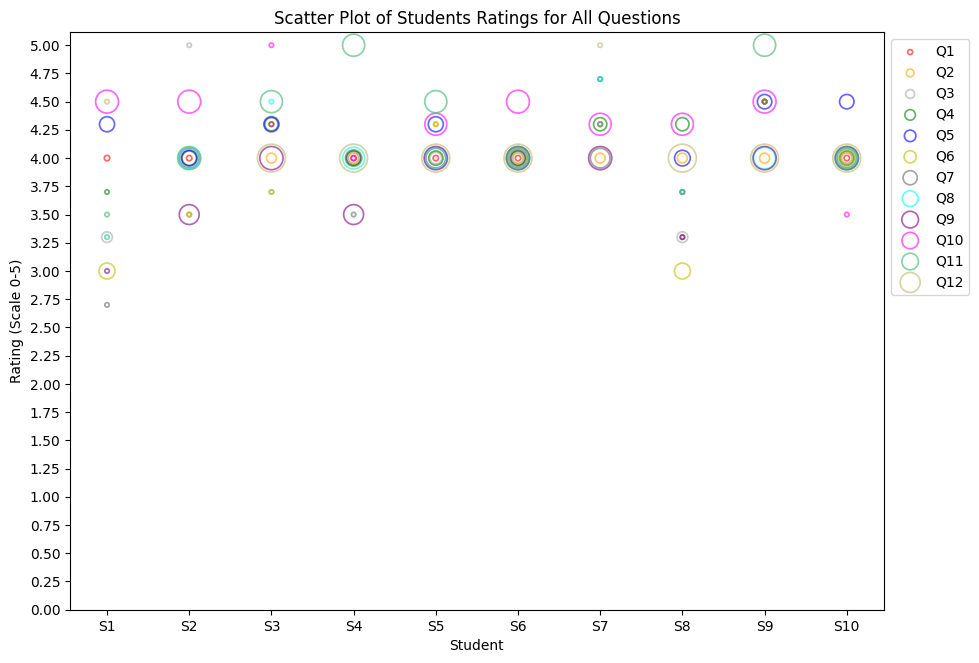

In [85]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  


# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data, sizes_dict):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)

    # Manually setting the size for datapoints depending on if the datapoints are stacked or not
    if frequency == 1: # if the frequency is 1 (it means no other points are stacked on top of each other) set the size to 10 
        return base_size
    else:
        # Increase the size with frequency
        return sizes_dict[question] * (1 + 0.1 * (frequency - 1))
    

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data, sizes_dict) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

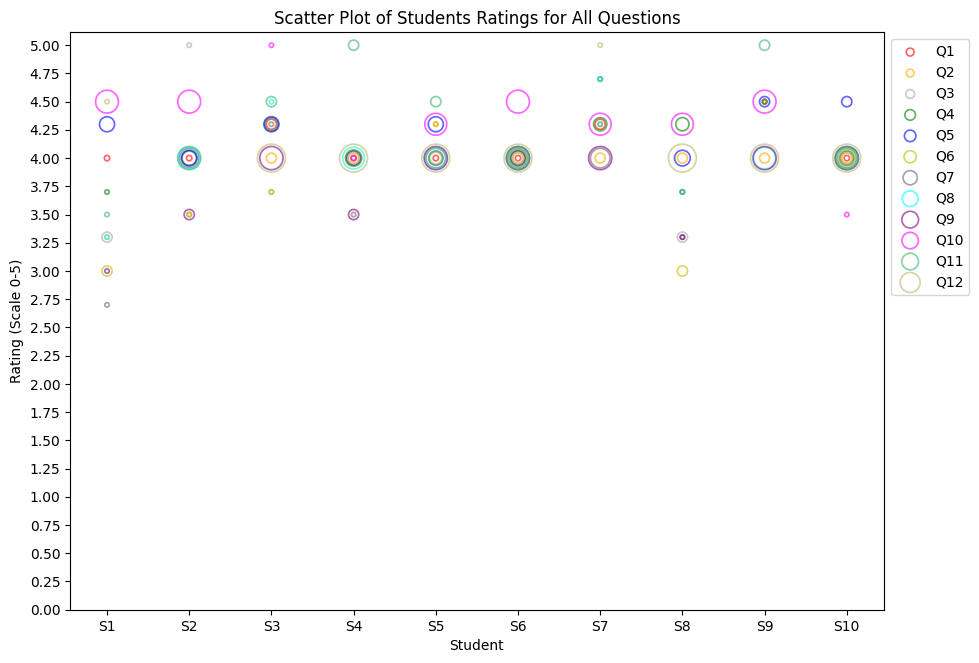

In [86]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data, sizes_dict):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)

    # Define the size increments
    base_size = 10
    size_increment = 22

    # Manually setting the size for datapoints depending on if the datapoints are stacked or not
    if frequency == 1: # if the frequency is 1 (it means no other points are stacked on top of each other) set the size to 10 
        return base_size
    elif frequency == 2:
        return base_size + 2 * size_increment
    else:
        # Increase the size with frequency
        return sizes_dict[question] * (1 + 0.1 * (frequency - 1))
    

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data, sizes_dict) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

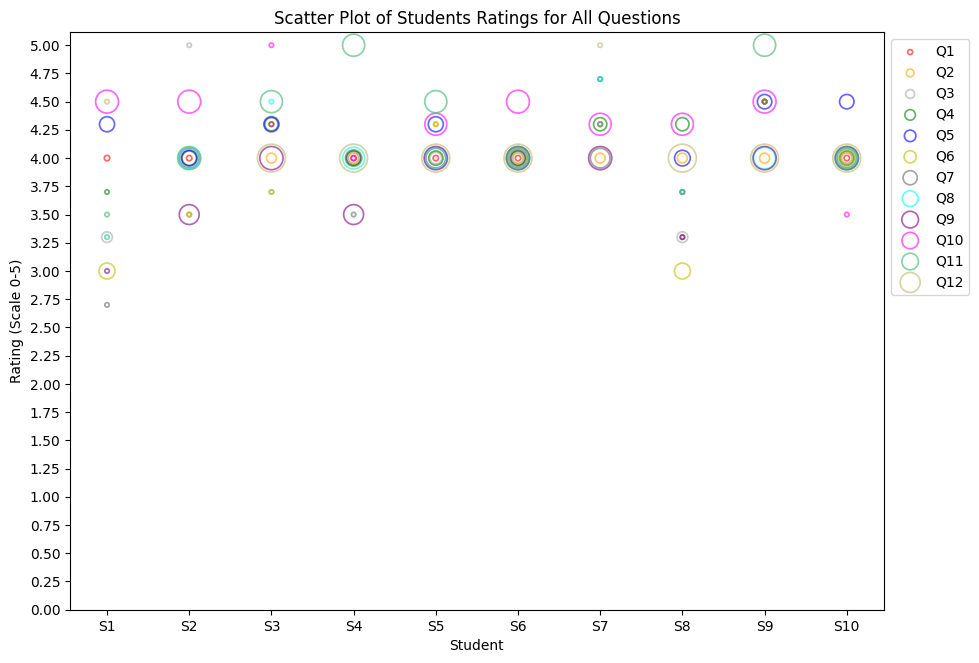

In [91]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'darkgray', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'dimgray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki',
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns black
    return color_dict.get(ques_column_name, 'black')  

# creating a fuction to get the size of a datapoint based on frequency
def get_point_size_based_on_frequency(student, question, data, sizes_dict):
    # The rating for the given student for a particular question is retrieved from the dataset
    student_rating = data.loc[data['Student'] == student, question].values[0]
    # Calculate the frequency of this rating for the specific question
    frequency = sum(data[question] == student_rating)

    # Manually setting the size for datapoints depending on if the datapoints are stacked or not
    if frequency == 1: # if the frequency is 1 (it means no other points are stacked on top of each other) set the size to 10 
        return 10
    elif frequency == 2:
        return sizes_dict[question] * (1 + 0.1 * (frequency - 1))
    else:
        # Increase the size with frequency
        return sizes_dict[question] * (1 + 0.1 * (frequency - 1))
    

# setting up size of the plot
plt.figure(figsize=(10.5, 7.5))
# for a rating given a particular question in the columns of student_data starting from the second column and continuing until the last column
# the first column is ignored because it contains the students
for question in student_data.columns[1:]:
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # for student in student_data['Student' iterates over each student identifier in the 'Student' column
    # get_point_size_based_on_frequency(student, question, student_data, sizes_dict) is a function call within the List Comprehension
    # So, For each student in student_data['Student'], it calls the get_point_size_based_on_frequency 
    sizes = [get_point_size_based_on_frequency(student, question, student_data, sizes_dict) for student in student_data['Student']]
    # Creating a scatter plot for each question
    sns.scatterplot(x=student_data['Student'], y=question, data=student_data, edgecolor=question_color(question), facecolor='none', 
                    s=sizes, label=question, alpha=0.6, linewidth=1.25)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()